In [2]:
import os
os.chdir(r"C:\Users\Hiromi\Documents\WPI\GQP Takeda\HAPT Data Set")
a = os.getcwd()
print (a)

C:\Users\Hiromi\Documents\WPI\GQP Takeda\HAPT Data Set


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sb

train = pd.read_csv("./train.csv")
#train.info()
train.drop(['id'], axis = 1, inplace = True)
train.shape
data = train
data.describe()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,activity
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,-0.316548,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888,3.934595
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.313899,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196,2.160171
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874,1.000000
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,-0.548129,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560,2.000000
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,-0.353980,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583,4.000000
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,-0.137462,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,0.938491,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000,12.000000


In [3]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('activity',axis=1),data['activity'],test_size=.2,random_state=1)

In [3]:
X_train.shape, X_test.shape

NameError: name 'X_train' is not defined

In [5]:
y_train.shape,y_test.shape

((6213L,), (1554L,))

In [6]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colName = corr_matrix.columns[i]
                col_corr.add(colName)
    return col_corr
col= correlation(X_train, 0.8)
print ('Correlated Columns: ', col )  

('Correlated Columns: ', set(['tBodyAccJerkMag-Mad-1', 'fBodyGyroMag-Energy-1', 'tXAxisAcc-AngleWRTGravity-1', 'tBodyGyroJerk-SMA-1', 'tBodyAcc-SMA-1', 'fBodyAccJerk-Kurtosis-1', 'fBodyAccJerk-Kurtosis-2', 'fBodyAccJerk-Kurtosis-3', 'tGravityAccMag-Max-1', 'tGravityAcc-Max-2', 'tGravityAcc-Max-3', 'tGravityAcc-Max-1', 'fBodyAccMag-Mean-1', 'tBodyGyro-Min-2', 'tGravityAccMag-ARCoeff-4', 'tGravityAccMag-ARCoeff-2', 'tGravityAccMag-ARCoeff-3', 'tGravityAccMag-ARCoeff-1', 'tBodyGyro-STD-1', 'tBodyGyro-STD-3', 'tBodyGyro-STD-2', 'tBodyGyro-Min-1', 'fBodyAccJerk-SMA-1', 'tBodyAccJerkMag-Min-1', 'tBodyGyroJerkMag-Max-1', 'tZAxisAcc-AngleWRTGravity-1', 'fBodyGyro-SMA-1', 'tBodyAccJerk-Min-3', 'tBodyAccJerk-Min-2', 'tBodyAccJerk-Min-1', 'tBodyAccMag-ARCoeff-2', 'fBodyGyroJerkMag-STD-1', 'tGravityAccMag-Mad-1', 'fBodyGyro-STD-3', 'fBodyGyro-STD-2', 'fBodyGyro-STD-1', 'fBodyGyroMag-Mad-1', 'fBodyGyroMag-IQR-1', 'tBodyAccJerk-ARCoeff-6', 'tBodyAccJerkMag-ARCoeff-2', 'tBodyAccJerk-SMA-1', 'fBodyAcc

In [7]:
X_train.drop(columns=col,axis=1,inplace=True)
X_test.drop(columns=col,axis=1,inplace=True)
#lets check the shape of training set and test set.
X_train.shape,X_test.shape

((6213, 146), (1554, 146))

In [8]:
list(col)

['tBodyAccJerkMag-Mad-1',
 'fBodyGyroMag-Energy-1',
 'tXAxisAcc-AngleWRTGravity-1',
 'tBodyGyroJerk-SMA-1',
 'tBodyAcc-SMA-1',
 'fBodyAccJerk-Kurtosis-1',
 'fBodyAccJerk-Kurtosis-2',
 'fBodyAccJerk-Kurtosis-3',
 'tGravityAccMag-Max-1',
 'tGravityAcc-Max-2',
 'tGravityAcc-Max-3',
 'tGravityAcc-Max-1',
 'fBodyAccMag-Mean-1',
 'tBodyGyro-Min-2',
 'tGravityAccMag-ARCoeff-4',
 'tGravityAccMag-ARCoeff-2',
 'tGravityAccMag-ARCoeff-3',
 'tGravityAccMag-ARCoeff-1',
 'tBodyGyro-STD-1',
 'tBodyGyro-STD-3',
 'tBodyGyro-STD-2',
 'tBodyGyro-Min-1',
 'fBodyAccJerk-SMA-1',
 'tBodyAccJerkMag-Min-1',
 'tBodyGyroJerkMag-Max-1',
 'tZAxisAcc-AngleWRTGravity-1',
 'fBodyGyro-SMA-1',
 'tBodyAccJerk-Min-3',
 'tBodyAccJerk-Min-2',
 'tBodyAccJerk-Min-1',
 'tBodyAccMag-ARCoeff-2',
 'fBodyGyroJerkMag-STD-1',
 'tGravityAccMag-Mad-1',
 'fBodyGyro-STD-3',
 'fBodyGyro-STD-2',
 'fBodyGyro-STD-1',
 'fBodyGyroMag-Mad-1',
 'fBodyGyroMag-IQR-1',
 'tBodyAccJerk-ARCoeff-6',
 'tBodyAccJerkMag-ARCoeff-2',
 'tBodyAccJerk-SMA-1'

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor
#k_features = 15
#forward = True
#verbose = 2
#cv = 5
#n_jobs = -1
#scoring 

model = sfs(RandomForestRegressor(), k_features = 15, forward = True, verbose = 2, cv = 5, n_jobs = -1, scoring = 'r2')
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   28.2s finished

[2019-02-08 11:46:01] Features: 1/15 -- score: 0.580099783083[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   27.0s finished

[2019-02-08 11:46:28] Features: 2/15 -- score: 0.807043963357[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   33.3s finished

[2019-02-08 11:47:02] Features: 3/15 -- score: 0.900496041089[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   33.4s finished

[2019-02-08 11:47:36] Features: 4/15 -- score: 0.931647697706[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   38.7s finished

[2019-02-08 11:48:15] Features: 5/15 -- score: 0.94695934469[Parallel(n_jobs=-1)]: Don

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
             floating=False, forward=True, k_features=15, n_jobs=-1,
             pre_dispatch='2*n_jobs', scoring='r2', verbose=2)

In [67]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
feature = RandomForestClassifier(n_estimators = 500, n_jobs = -1, random_state = 10)
feature.fit(X_train, y_train)
#for name, importance in zip(feature.k_feature_names_, feature.feature_importances_):
#    print name + ":" + importance

#>>> for name, importance in zip(iris["feature_names"], rnd_clf.feature_importances_):
#...     print(name, "=", importance)
importances = feature.feature_importances_
indices = np.argsort(importances)[-20:]
indices


array([ 17,  24,  21, 118, 132,  28, 125,  78,   5, 127,  26,   4,  29,
        30,  77,  15,  20,   3,  19,  18], dtype=int64)

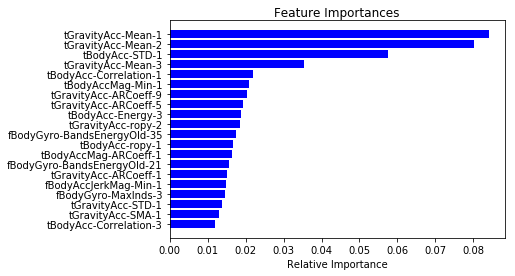

In [68]:
plt.title('Feature Importances')
col = X_train.columns
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [col[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [77]:
var_names =np.array(list(col))
#var_names #Gives a list of column names
#count = list(var_names)
#np.ma.size(count,0)  # Gives a number of columns

146L

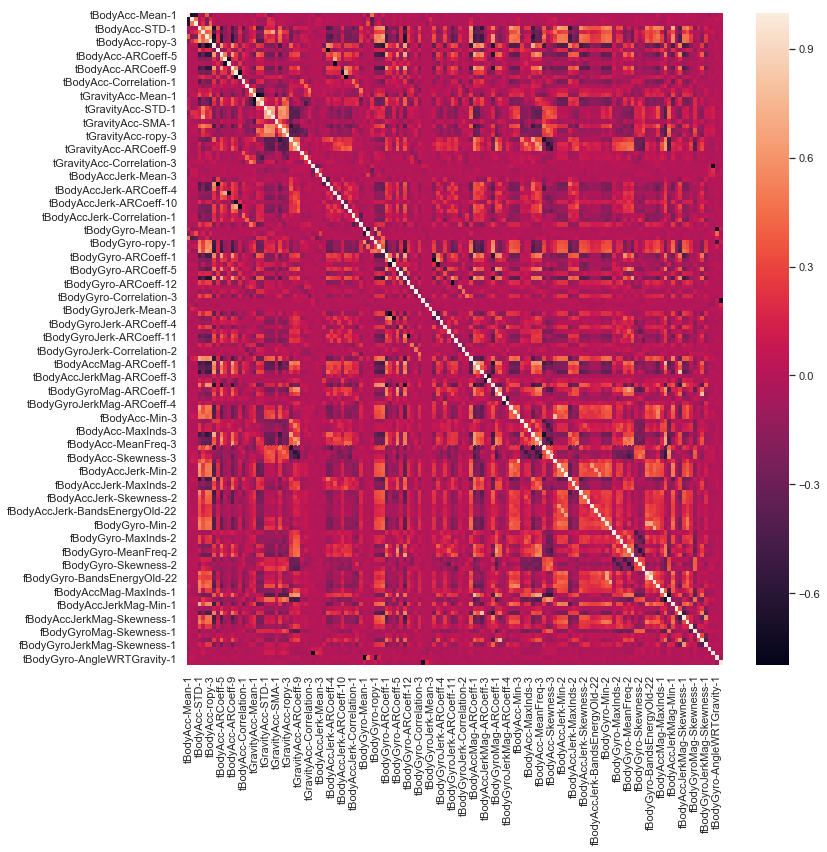

In [85]:
sb.set(rc={'figure.figsize':(12,12)})
sb.heatmap(X_train.corr())  

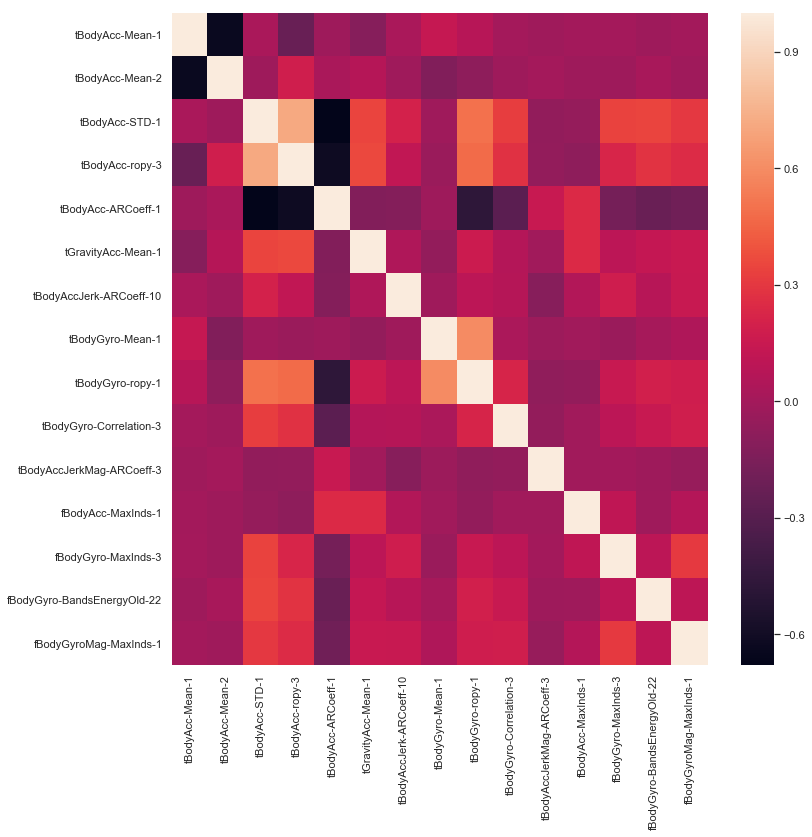

In [182]:
sb.set(rc={'figure.figsize':(12,12)})
sb.heatmap(train_X.corr()) 

In [110]:
feature_names = list(col)
#feature_names
data = data.drop(feature_names, axis=1)
data.shape

(7767, 147)

In [138]:
## select features need to be removed
selected_fn = data.columns.get_values()
selected_fn = selected_fn.tolist()

In [133]:
train_X = data[selected_fn]
train_X = train_X.drop(['activity'], axis = 1)
train_y = data['activity']
print (train_X.shape, train_y.shape)

test = pd.read_csv("./test.csv")
#test.shape
test_X = test[selected_fn]
test_X = test_X.drop(['activity'], axis = 1)
test_y = test['activity']
print (test_X.shape, test_y.shape)



((7767, 146), (7767L,))
((3162, 146), (3162L,))


In [140]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor
#k_features = 15
#forward = True
#verbose = 2
#cv = 5
#n_jobs = -1
#scoring 

model = sfs(RandomForestRegressor(), k_features = 15, forward = True, verbose = 2, cv = 5, n_jobs = -1, scoring = 'r2')
model.fit(train_X, train_y)

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   38.7s finished

[2019-02-11 13:01:20] Features: 1/15 -- score: 0.577561505446[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   35.1s finished

[2019-02-11 13:01:56] Features: 2/15 -- score: 0.797958830481[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   41.2s finished

[2019-02-11 13:02:37] Features: 3/15 -- score: 0.881329475488[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   43.5s finished

[2019-02-11 13:03:21] Features: 4/15 -- score: 0.905319569558[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   52.6s finished

[2019-02-11 13:04:14] Features: 5/15 -- score: 0.918675388161[Parallel(n_jobs=-1)]: Do

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
             floating=False, forward=True, k_features=15, n_jobs=-1,
             pre_dispatch='2*n_jobs', scoring='r2', verbose=2)

In [141]:
model.k_feature_idx_
model.k_feature_names_

('tBodyAcc-Mean-1',
 'tBodyAcc-Mean-2',
 'tBodyAcc-STD-1',
 'tBodyAcc-ropy-3',
 'tBodyAcc-ARCoeff-1',
 'tGravityAcc-Mean-1',
 'tBodyAccJerk-ARCoeff-10',
 'tBodyGyro-Mean-1',
 'tBodyGyro-ropy-1',
 'tBodyGyro-Correlation-3',
 'tBodyAccJerkMag-ARCoeff-3',
 'fBodyAcc-MaxInds-1',
 'fBodyGyro-MaxInds-3',
 'fBodyGyro-BandsEnergyOld-22',
 'fBodyGyroMag-MaxInds-1')

((7767, 15), (7767L,))
((3162, 15), (3162L,))


### Variance filtering 

In [4]:
#numeric = train
var = train.var() # calculate variance for each feature
numeric = train.columns
unwanted_variable = [ ]
for i in range(0,len(var)):
    if var[i]< 0.01:   #setting the threshold as 0.01%
        unwanted_variable.append(numeric[i+1])
unwanted_variable
#print (len(unwated_variable)) #30 variables

['tBodyAcc-Mean-3',
 'tBodyAcc-STD-1',
 'fBodyAcc-BandsEnergyOld-33',
 'fBodyAcc-BandsEnergyOld-34',
 'fBodyAcc-BandsEnergyOld-40',
 'fBodyAccJerk-Mean-1',
 'fBodyAccJerk-BandsEnergyOld-9',
 'fBodyAccJerk-BandsEnergyOld-23',
 'fBodyAccJerk-BandsEnergyOld-33',
 'fBodyAccJerk-BandsEnergyOld-34',
 'fBodyAccJerk-BandsEnergyOld-40',
 'fBodyGyro-Mean-1',
 'fBodyGyro-BandsEnergyOld-5',
 'fBodyGyro-BandsEnergyOld-7',
 'fBodyGyro-BandsEnergyOld-8',
 'fBodyGyro-BandsEnergyOld-9',
 'fBodyGyro-BandsEnergyOld-13',
 'fBodyGyro-BandsEnergyOld-15',
 'fBodyGyro-BandsEnergyOld-19',
 'fBodyGyro-BandsEnergyOld-20',
 'fBodyGyro-BandsEnergyOld-23',
 'fBodyGyro-BandsEnergyOld-26',
 'fBodyGyro-BandsEnergyOld-29',
 'fBodyGyro-BandsEnergyOld-33',
 'fBodyGyro-BandsEnergyOld-34',
 'fBodyGyro-BandsEnergyOld-35',
 'fBodyGyro-BandsEnergyOld-37',
 'fBodyGyro-BandsEnergyOld-40',
 'fBodyGyro-BandsEnergyOld-41',
 'fBodyAccMag-Mean-1']

In [5]:
#dropping unwated variables (30 variables)
train = train.drop(columns = unwanted_variable, axis = 1)
train.shape

(7767, 532)

## Train and Test dataset

In [40]:
new_col = train.drop(['activity'], axis = 1)
new_col = list(new_col)
X_train = train[new_col]
y_train = train['activity']
print (X_train.shape, y_train.shape)

(7767, 531) (7767,)


In [41]:
test = pd.read_csv("./test.csv")
#test.shape
X_test = test[new_col]
y_test = test['activity']
print (X_test.shape, y_test.shape)

(3162, 531) (3162,)


#### Ridge Regression

In [8]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


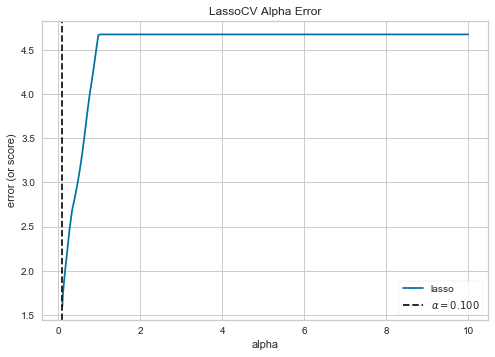

In [93]:
alphas = np.logspace(-1, 1, 100)
model = LassoCV(alphas=alphas, tol = 0.1)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
g = visualizer.poof()

Text(0, 0.5, 'weights')

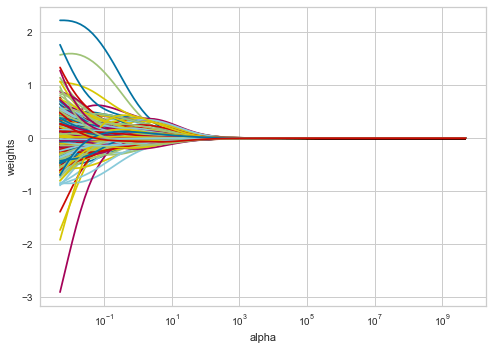

In [17]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [21]:
#from sklearn.metrics import make_scorer, mean_squared_error
#scorer = make_scorer(mean_squared_error, False)
#solvers = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
#cv_score = []
#for i in solvers:
#    for ii in alphas:
#        clf = Ridge(alpha = ii, solver = i)
#        cv_score.append(np.sqrt(-cross_val_score(estimator=clf, 
#                                            X=X_train, 
#                                            y=y_train, 
#                                            cv=5, 
#                                            scoring = "neg_mean_squared_error")).mean())

In [28]:
for i in alphas:
    clf = Ridge(alpha=i)
    clf.fit(X_train, y_train)

In [33]:
clf.get_params (deep = True)

{'alpha': 0.005,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [51]:
clf.coef_

array([ 1.97598675e+00,  1.32531300e+00, -1.74873927e+01,  2.16516326e+00,
        1.53693770e+00,  7.28209472e-01,  1.06476224e+00,  2.07976336e-01,
        1.78461923e-02,  4.33934495e-02, -1.61254497e-01, -5.08785228e-02,
        3.02652731e-01,  2.94186178e+00, -7.12432074e-01, -2.45550802e-01,
        1.22221099e+00, -5.82400008e-02,  5.08797369e-01, -2.07894671e-01,
        6.82562388e-02, -2.78638272e-01,  6.98095367e-02,  1.24050715e+00,
        1.13393240e+00, -9.09170844e-02, -4.88418855e-01,  3.17778134e-01,
       -5.74284941e-01, -1.33530765e+00, -8.96768544e-01,  1.98973253e+00,
        2.62910198e+00, -5.33378456e-01, -8.68569145e-01,  8.53944394e-02,
        9.15648817e-02, -1.67766411e-02,  2.11805438e-01,  1.33262421e+00,
        1.28757613e-01, -1.20108842e+01,  1.17379763e+01,  8.21334957e-02,
        3.44732715e+00, -1.14520889e+01,  1.74697965e+00,  8.03135979e+00,
        9.04725552e-01, -5.92700508e-01, -9.44730636e+00, -9.78769941e-01,
        4.40791224e-01, -

In [52]:
clf.score(X_train, y_train)

0.9408779252765249

In [56]:
from sklearn.linear_model import LassoLarsCV
model = LassoLarsCV(cv=10, precompute=False).fit(X_train,y_train)

C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 87 iterations, i.e. alpha=4.162e-04, with an active set of 69 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 120 iterations, i.e. alpha=2.431e-04, with an active set of 102 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 122 iterations, i.e. alpha=2.394e-04, with an active set of 104 regressors, and the smallest c

C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 78 iterations, i.e. alpha=4.511e-04, with an active set of 64 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 90 iterations, i.e. alpha=3.636e-04, with an active set of 76 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:337: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 114 iterations, alpha=2.511e-04, previous al

C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 180 iterations, i.e. alpha=1.101e-04, with an active set of 144 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 208 iterations, i.e. alpha=7.495e-05, with an active set of 156 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 208 iterations, i.e. alpha=7.495e-05, with an active set of 156 regressors, and the smallest

C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:337: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 131 iterations, alpha=2.175e-04, previous alpha=2.118e-04, with an active set of 116 regressors.
  ConvergenceWarning)
C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 71 iterations, i.e. alpha=4.990e-04, with an active set of 59 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 74 iterations, i.e. alpha=4.723e-04, with an active set of 62 regressors, and the smallest cholesky pivot element being 2.

In [61]:
#model.coef_
test = model.score(X_test, y_test)
test

0.8725546221773771

In [76]:
y = y_train.as_matrix()
X = X_train.as_matrix()
print (X.shape)
colnames = X_train.columns

(7767, 531)


C:\Users\Hiromi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Hiromi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [72]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)

lasso = Lasso(alpha=0.005, normalize=False)
lasso.fit(X,y)
lasso_coef = lasso.coef_
print(lasso_coef)

[ 3.84159199e-01  9.80206865e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.47647081e-01
  1.61986628e-01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.64485864e-01
  0.00000000e+00 -1.72870835e-02  2.96771768e-02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.87843327e-03  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  5.65038148e-02
  3.28120830e-02 -4.43345406e-02 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.20224716e-01  8.63450562e-01  3.30724826e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.13959981e-01 -5.77292609e-01 -0.00000000e+00
  0.00000000e+00 -3.11932157e-01 -5.01698464e-01  1.10382437e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.96421907e-01  1.00964

C:\Users\Hiromi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
